# Analise de Dados da Pandemia de Covid-19 nos Estados Brasileiros 

In [5]:
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import json
import folium 
from folium import plugins
from IPython.display import Image

In [6]:
covid = pd.read_csv('covid.csv.gz', index_col='date', parse_dates=True)
covid.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1809424 entries, 2020-03-17 to 2021-03-28
Data columns (total 17 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   epidemiological_week                           int64  
 3   estimated_population                           float64
 4   estimated_population_2019                      float64
 5   is_last                                        bool   
 6   is_repeated                                    bool   
 7   last_available_confirmed                       int64  
 8   last_available_confirmed_per_100k_inhabitants  float64
 9   last_available_date                            object 
 10  last_available_death_rate                      float64
 11  last_available_deaths                          int64  
 12  order_for_place            

In [8]:
covid.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,1.802694e+06,1.809424e+06,1.802694e+06,1.802694e+06,1.809424e+06,1.787175e+06,1.809424e+06,1.809424e+06,1.809424e+06,1.809424e+06,1.809424e+06
mean,3.217500e+06,2.020548e+05,8.737765e+04,8.670935e+04,1.934190e+03,2.167030e+03,2.958883e-02,5.318889e+01,1.629909e+02,1.377501e+01,3.426986e-01
std,1.011109e+06,3.224507e+01,9.515769e+05,9.447003e+05,2.398576e+04,2.334271e+03,7.053377e-02,7.470391e+02,9.531780e+01,1.912054e+02,5.339020e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,-1.391500e+04,-1.870000e+02
25%,2.507408e+06,2.020310e+05,5.781000e+03,5.770000e+03,3.600000e+01,4.348399e+02,3.700000e-03,1.000000e+00,8.100000e+01,0.000000e+00,0.000000e+00
50%,3.143203e+06,2.020430e+05,1.260800e+04,1.257100e+04,1.530000e+02,1.474057e+03,1.700000e-02,3.000000e+00,1.620000e+02,0.000000e+00,0.000000e+00
75%,4.115853e+06,2.021010e+05,2.794100e+04,2.777600e+04,5.250000e+02,3.121552e+03,3.120000e-02,1.100000e+01,2.420000e+02,3.000000e+00,0.000000e+00
max,5.300108e+06,2.021130e+05,4.628933e+07,4.591905e+07,2.420100e+06,3.442914e+04,1.000000e+00,7.199100e+04,3.980000e+02,4.502000e+04,1.193000e+03


In [9]:
covid_estados = covid[covid.place_type == 'state']
covid_estados.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,NaN,12.0,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0
2020-03-20,NaN,12.0,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0
2020-03-21,NaN,12.0,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0


In [10]:
casos_total = covid_estados.new_confirmed.sum()
obitos_total = covid_estados.new_deaths.sum()
print(f'Total de Casos confirmados de Covid-19 no Brasil até {covid.index[-1]}: {casos_total}')
print(f'Total de Mortes confirmadas por Covid-19 no Brasil até {covid.index[-1]}: {obitos_total}')

Total de Casos confirmados de Covid-19 no Brasil até 2021-03-28 00:00:00: 12542214
Total de Mortes confirmadas por Covid-19 no Brasil até 2021-03-28 00:00:00: 312432


# Casos Confirmados por Unidade Federativa

In [11]:
casos_por_estados = covid_estados.groupby('state')['new_confirmed'].sum()
casos_por_estados = casos_por_estados.sort_values(ascending=False)
casos_por_estados = pd.DataFrame(casos_por_estados)
casos_por_estados

,new_confirmed
state,
SP,2420100
MG,1100575
PR,836936
RS,830630
SC,795391
BA,794437
RJ,640467
CE,527185
GO,475463


# Óbitos confirmados por Unidade Federativa

In [12]:
obitos_por_estados = covid_estados.groupby('state')['new_deaths'].sum()
obitos_por_estados = obitos_por_estados.sort_values(ascending=False)
obitos_por_estados = pd.DataFrame(obitos_por_estados)
obitos_por_estados

,new_deaths
state,
SP,71991
RJ,36109
MG,23687
RS,18823
PR,16190
BA,14960
CE,13596
PE,12006
AM,11952


# Evolução Diária da Pandemia

In [13]:
evolucao_diaria = covid_estados.groupby(covid_estados.index)[['new_confirmed', 'new_deaths']].sum()
evolucao_diaria.tail()

,new_confirmed,new_deaths
date,,
2021-03-24,90424,2307
2021-03-25,98839,2664
2021-03-26,80324,3500
2021-03-27,81703,3407
2021-03-28,43583,1481


# Média Móvel de Casos e Óbitos confirmados

In [14]:
evolucao_diaria['moving_average_cases'] = evolucao_diaria.new_confirmed.rolling(window=8).mean()
evolucao_diaria['moving_average_deaths'] = evolucao_diaria.new_deaths.rolling(window=8).mean()
evolucao_diaria.tail()

,new_confirmed,new_deaths,moving_average_cases,moving_average_deaths
date,,,,
2021-03-24,90424,2307,77117.875,2339.125
2021-03-25,98839,2664,78391.125,2339.500
2021-03-26,80324,3500,77440.875,2436.500
2021-03-27,81703,3407,76621.375,2530.375
2021-03-28,43583,1481,72925.000,2419.500


Text(0.5, 1.0, 'Casos Acumulados de covid-19 no Brasil')

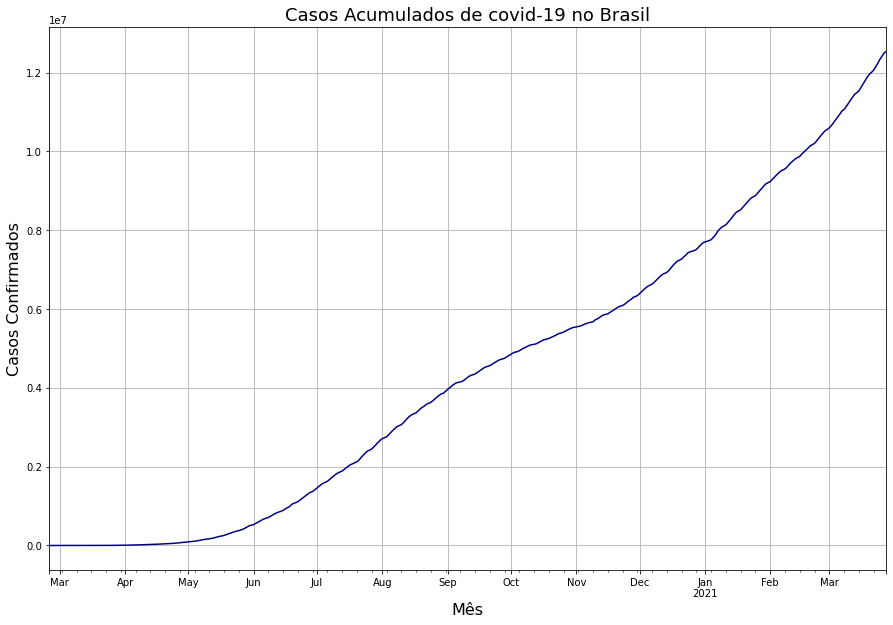

In [15]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_confirmed.cumsum().plot(grid=True, kind='line', color='#000082')
plt.xlabel('Mês', fontsize=16)
plt.ylabel('Casos Confirmados', fontsize=16)
plt.title('Casos Acumulados de covid-19 no Brasil', fontsize=18)

Text(0.5, 1.0, 'Óbitos acumulados de covid-19 no Brasil')

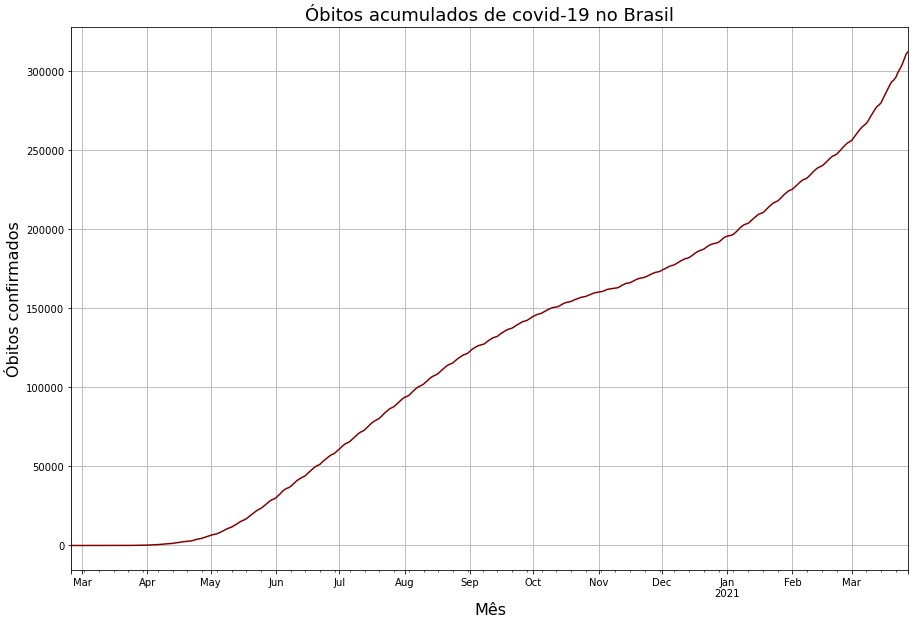

In [16]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_deaths.cumsum().plot(grid=True, kind='line', color='#820000')
plt.xlabel('Mês', fontsize=16)
plt.ylabel('Óbitos confirmados', fontsize=16)
plt.title('Óbitos acumulados de covid-19 no Brasil', fontsize=18)

Text(0.5, 1.0, 'Casos Confirmados x Média Móvel de Casos Confirmados por Covid-19 no Brasil')

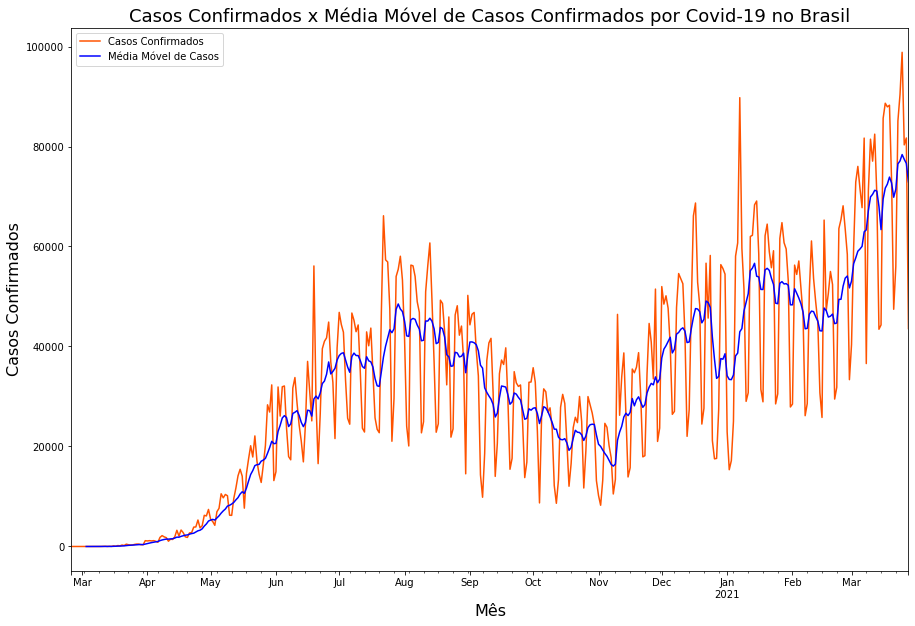

In [17]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_confirmed.plot(kind="line", color='#ff5300')
evolucao_diaria.moving_average_cases.plot(kind='line', color='b')
plt.xlabel('Mês', fontsize=16)
plt.ylabel('Casos Confirmados', fontsize=16)
plt.legend(['Casos Confirmados', 'Média Móvel de Casos'], loc='best')
plt.title('Casos Confirmados x Média Móvel de Casos Confirmados por Covid-19 no Brasil', fontsize=18)

Text(0.5, 1.0, 'Óbitos confirmados x Média móvel de Obitos confirmados por Covid-19 no Brasil')

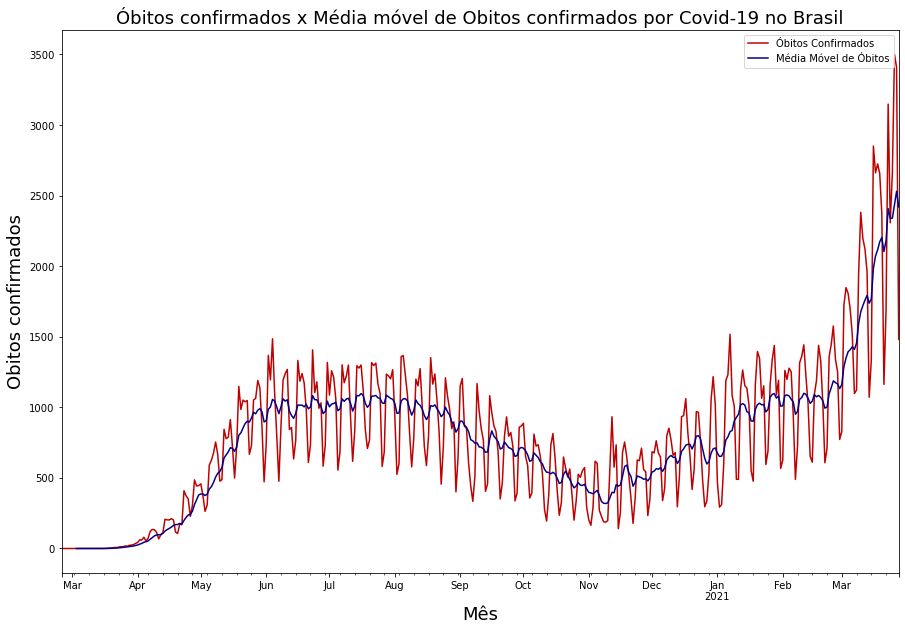

In [18]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_deaths.plot(kind='line', color='#be0101')
evolucao_diaria.moving_average_deaths.plot(kind='line', color='#00018a')
plt.xlabel('Mês', fontsize=18)
plt.ylabel('Obitos confirmados', fontsize=18)
plt.legend(['Óbitos Confirmados', 'Média Móvel de Óbitos'], loc='best')
plt.title('Óbitos confirmados x Média móvel de Obitos confirmados por Covid-19 no Brasil', fontsize=18)

In [19]:
estados = 'states.json'
geo_json_data = json.load(open(estados))

In [20]:
casos_por_estados = np.log(casos_por_estados.new_confirmed)
obitos_por_estados = np.log(obitos_por_estados.new_deaths)

In [21]:
# Cria um Mapa
mapa1 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

# Cria um mapa 
mapa2 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

In [22]:
mapa1.choropleth(
    geo_data = geo_json_data,
    name = 'Casos de Covid-19 por UF',
    data = casos_por_estados,
    columns=[casos_por_estados.index, 'new_confirmed'],
    key_on = 'feature.id',
    fill_color='OrRd',
    fill_opacity=0.8,
    legend_name = 'Casos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png')

mapa2.choropleth(
    geo_data = geo_json_data,
    name = 'Obitos de Covid-19 por UF',
    data = obitos_por_estados,
    columns=[obitos_por_estados.index, 'new_deaths'],
    key_on = 'feature.id',
    fill_color='Reds',
    fill_opacity=0.8,
    legend_name = 'Óbitos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png')

C:\Users\vinic\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# Estados com os maiores indíces de casos confirmados por covid-19

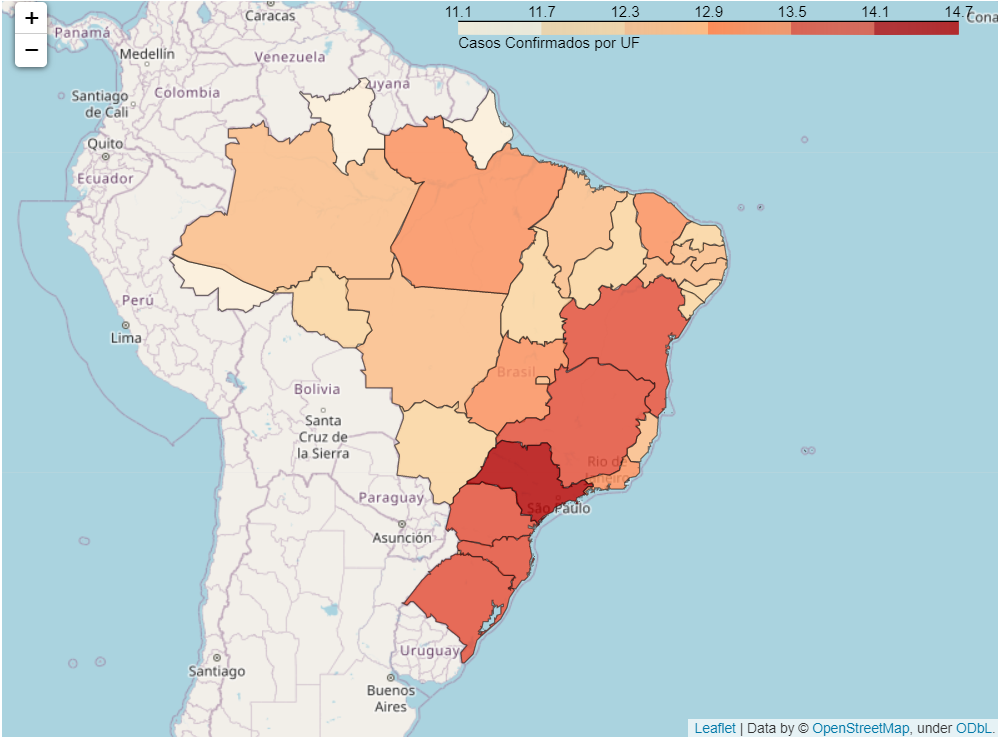

In [23]:
Image(filename='Photo.png')

# Estados com os maiores indíces de óbitos confirmados por covid-19

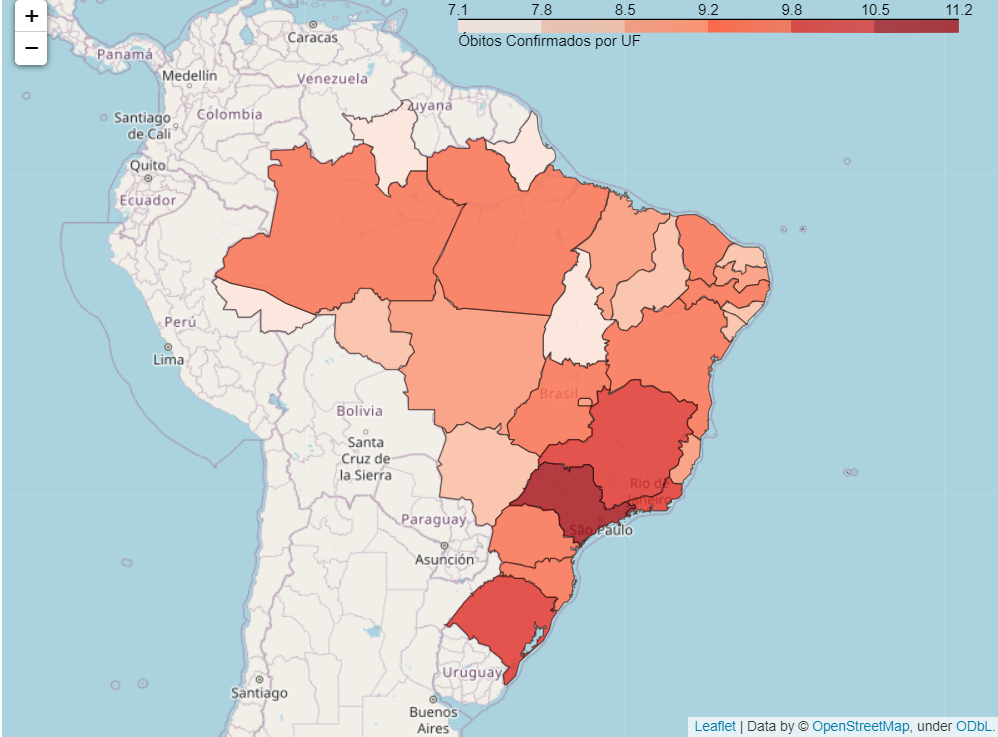

In [24]:
Image(filename='Photo2.png')